# 1. Problem Statement

In [2]:
# forecast the sales of furniture products for 1year based on historical data 

# Importing Basic Libraries

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#pip install xlrd

# 2.Read The Data Set 

In [50]:
# importing data
df = pd.read_table(r"C:\Users\Pragya\Desktop\train.csv",delimiter=",")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,11-08-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,11-08-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,06-12-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,10-11-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,10-11-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,11-08-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,11-08-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,06-12-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,10-11-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,10-11-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
df.shape

(9800, 18)

In [32]:
df["Category"].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [33]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# 3. Filtering The Data Set OF Furniture

In [51]:
furniture = df[df["Category"]=="Furniture"]
furniture.shape

(2078, 18)

# 4. Subsetting The Required Column

In [52]:
furniture = furniture[["Order Date","Sales"]]
furniture.shape

(2078, 2)

# 5. Check Datatype Of Date Variable

In [53]:
furniture.dtypes

Order Date     object
Sales         float64
dtype: object

In [54]:
furniture ["Order Date"]=pd.to_datetime(furniture["Order Date"])

# 6. Check The Time Range

In [55]:
furniture["Order Date"].min(),furniture["Order Date"].max()

(Timestamp('2015-01-06 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [17]:
furniture.head()

,Order Date,Sales
0,11-08-2017,261.9600
1,11-08-2017,731.9400
3,10-11-2016,957.5775
5,06-09-2015,48.8600
10,06-09-2015,1706.1840


# 7. Sorting Data in Chronoloigical Order 

In [56]:
furniture = furniture.sort_values("Order Date",ascending = True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [19]:
furniture.head(10)

,Order Date,Sales
4009,01-01-2018,474.4300
8071,01-01-2018,310.7440
848,01-01-2018,48.8960
8070,01-01-2018,141.4200
213,01-02-2016,452.4500
4918,01-02-2017,173.9400
8362,01-02-2018,913.4300
5055,01-03-2016,1352.3976
9493,01-03-2017,1592.8500
5646,01-04-2016,192.2200


# 8. Checking For Duplicate Entries And Groping It

**Code for checking duplicate entries h ya nhi**

In [39]:
furniture["Order Date"].value_counts()

Order Date
09-05-2017    10
11-19-2018     9
12-25-2017     9
10-30-2018     9
12-01-2017     9
              ..
05-23-2016     1
09-23-2015     1
05-23-2017     1
05-23-2018     1
12-31-2016     1
Name: count, Length: 877, dtype: int64

**Code for applying group by**

In [57]:
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()
furniture.shape

(877, 2)

In [41]:
furniture.head(10)

,Order Date,Sales
0,01-01-2018,975.4900
1,01-02-2016,452.4500
2,01-02-2017,173.9400
3,01-02-2018,913.4300
4,01-03-2016,1352.3976
5,01-03-2017,1592.8500
6,01-04-2016,192.2200
7,01-05-2016,61.5840
8,01-06-2015,2573.8200
9,01-07-2015,76.7280


**Cross Checking ki duplicate entries group by hua ya mhi**

In [42]:
furniture["Order Date"].value_counts()

Order Date
01-01-2018    1
09-24-2018    1
09-21-2015    1
09-21-2016    1
09-22-2015    1
             ..
05-29-2017    1
05-29-2018    1
05-30-2015    1
05-30-2017    1
12-31-2016    1
Name: count, Length: 877, dtype: int64

# 9. Subset Date Variable As Row Index

In [58]:
furniture=furniture.set_index("Order Date")

In [44]:
furniture.head(10)

,Sales
Order Date,
01-01-2018,975.4900
01-02-2016,452.4500
01-02-2017,173.9400
01-02-2018,913.4300
01-03-2016,1352.3976
01-03-2017,1592.8500
01-04-2016,192.2200
01-05-2016,61.5840
01-06-2015,2573.8200


# check the need of Resampling

In [45]:
furniture.shape

(877, 1)

In [59]:
# w stands for weekly
y = furniture["Sales"].resample("M").mean()

C:\Users\Pragya\AppData\Local\Temp\ipykernel_16996\2048839011.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = furniture["Sales"].resample("M").mean()


In [60]:
print(y.shape)
y

(48,)


Order Date
2015-01-31     518.106417
2015-02-28     367.931600
2015-03-31     837.845176
2015-04-30     567.488357
2015-05-31     432.049188
2015-06-30     691.820084
2015-07-31     601.169500
2015-08-31     475.014033
2015-09-30     992.353367
2015-10-31     769.015437
2015-11-30     975.956395
2015-12-31    1531.867125
2016-01-31     978.328467
2016-02-29     522.395667
2016-03-31     623.045529
2016-04-30     805.822962
2016-05-31     624.996700
2016-06-30     443.586529
2016-07-31     759.280000
2016-08-31     602.412012
2016-09-30    1320.285421
2016-10-31     648.027083
2016-11-30    1258.229188
2016-12-31    1036.920509
2017-01-31     508.182867
2017-02-28     356.868273
2017-03-31     584.412476
2017-04-30     695.373158
2017-05-31     676.935227
2017-06-30     889.323143
2017-07-31     739.397588
2017-08-31     700.591665
2017-09-30    1114.811454
2017-10-31     621.737316
2017-11-30    1271.345152
2017-12-31    1407.883269
2018-01-31     456.166308
2018-02-28     521.105954
2

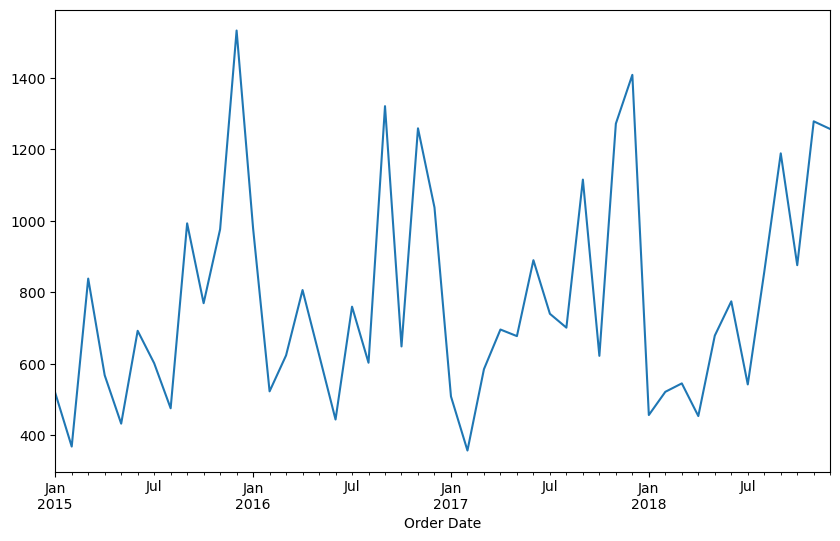

In [62]:
y.plot(figsize=(10,6))
plt.show()

# 12. splitting data into test and train

In [63]:
train = y.loc[:"2017-12-31"]
# train = y.iloc[0:36]
print(train.shape)
train

(36,)


Order Date
2015-01-31     518.106417
2015-02-28     367.931600
2015-03-31     837.845176
2015-04-30     567.488357
2015-05-31     432.049188
2015-06-30     691.820084
2015-07-31     601.169500
2015-08-31     475.014033
2015-09-30     992.353367
2015-10-31     769.015437
2015-11-30     975.956395
2015-12-31    1531.867125
2016-01-31     978.328467
2016-02-29     522.395667
2016-03-31     623.045529
2016-04-30     805.822962
2016-05-31     624.996700
2016-06-30     443.586529
2016-07-31     759.280000
2016-08-31     602.412012
2016-09-30    1320.285421
2016-10-31     648.027083
2016-11-30    1258.229188
2016-12-31    1036.920509
2017-01-31     508.182867
2017-02-28     356.868273
2017-03-31     584.412476
2017-04-30     695.373158
2017-05-31     676.935227
2017-06-30     889.323143
2017-07-31     739.397588
2017-08-31     700.591665
2017-09-30    1114.811454
2017-10-31     621.737316
2017-11-30    1271.345152
2017-12-31    1407.883269
Freq: ME, Name: Sales, dtype: float64

In [64]:
test = y.loc["2018-01-31":]
print(test.shape)
test

(12,)


Order Date
2018-01-31     456.166308
2018-02-28     521.105954
2018-03-31     544.672240
2018-04-30     453.297905
2018-05-31     678.302328
2018-06-30     774.199395
2018-07-31     541.705810
2018-08-31     856.617889
2018-09-30    1188.196083
2018-10-31     875.362728
2018-11-30    1277.817759
2018-12-31    1256.298672
Freq: ME, Name: Sales, dtype: float64

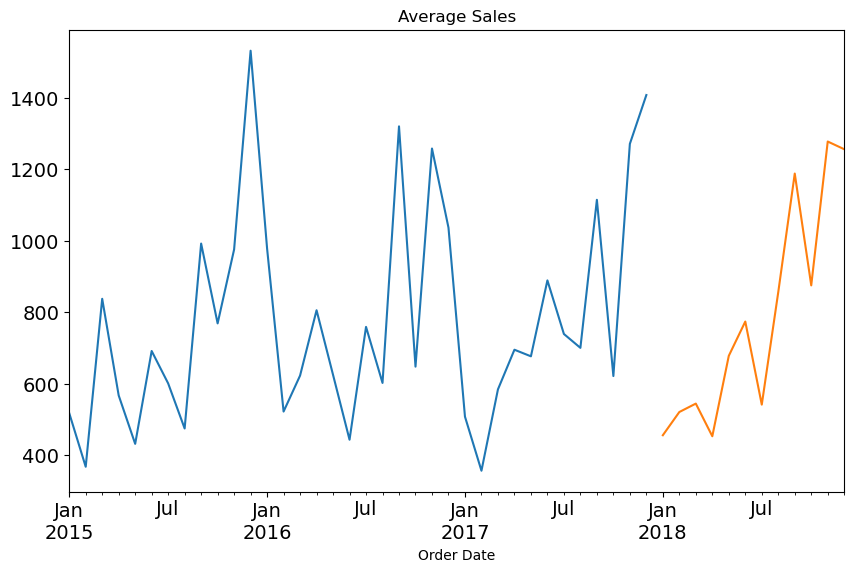

In [66]:
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

# 13.Decomposition

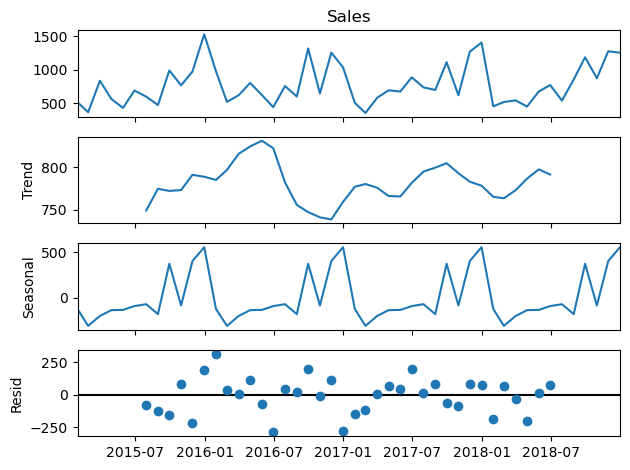

In [68]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

# 14.  Model Building

# (1)EXPONENTIAL SMOOTHING

**1. Simple Exponential Smoothing**

C:\Users\Pragya\OneDrive\Documents\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


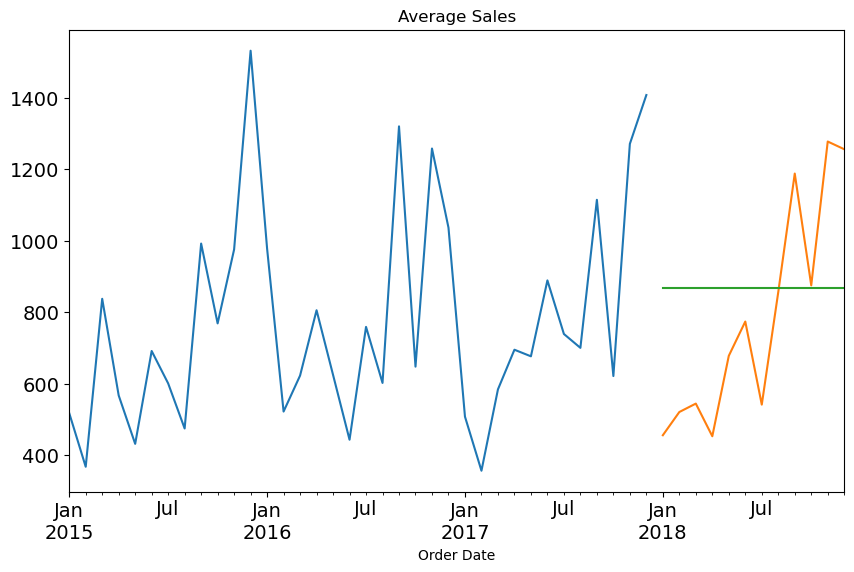

In [69]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [70]:
Exp_Smooth.SES

2018-01-31    868.097333
2018-02-28    868.097333
2018-03-31    868.097333
2018-04-30    868.097333
2018-05-31    868.097333
2018-06-30    868.097333
2018-07-31    868.097333
2018-08-31    868.097333
2018-09-30    868.097333
2018-10-31    868.097333
2018-11-30    868.097333
2018-12-31    868.097333
Freq: ME, dtype: float64

In [71]:
# AIC IS USED to compare different models with same algorithm but different data/parameters
# choose the model with lowest AIC value
fit1.aic

416.8956967807306

In [72]:
# RMSE is used to compare different models with same data but different algorithm 
# choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

308.13171104032153


**2.  Holt Model**

C:\Users\Pragya\OneDrive\Documents\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


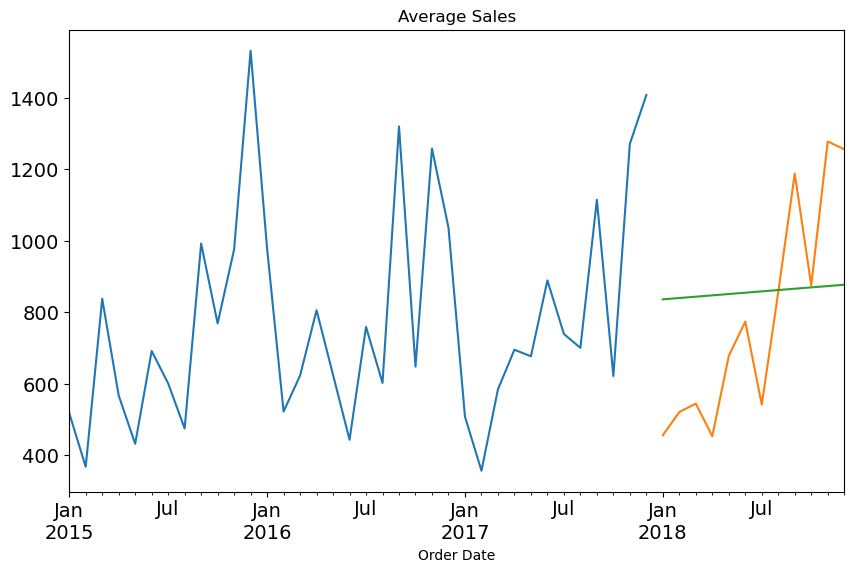

In [73]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.3)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [74]:
fit1.aic

456.6818827506208

In [75]:
Holt_df['Holt_linear']

2018-01-31    836.336923
2018-02-28    840.050520
2018-03-31    843.764118
2018-04-30    847.477715
2018-05-31    851.191313
2018-06-30    854.904911
2018-07-31    858.618508
2018-08-31    862.332106
2018-09-30    866.045704
2018-10-31    869.759301
2018-11-30    873.472899
2018-12-31    877.186496
Freq: ME, dtype: float64

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

294.2493801093521


In [ ]:
"""
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_trend = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
"""

In [ ]:
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

**3.  Holt Winter**

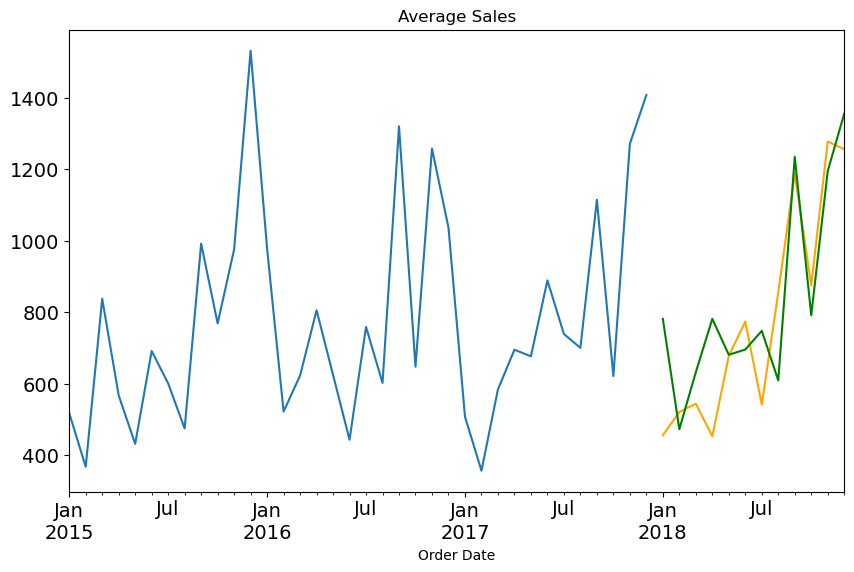

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',      # add----> for only seasonal data ,# mul---> for seasonal as well as trend
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="orange")
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="green")
plt.show()


In [80]:
Holt_Winter_df['Holt_Winter']

2018-01-31     781.649041
2018-02-28     472.956380
2018-03-31     632.477310
2018-04-30     781.718244
2018-05-31     681.288319
2018-06-30     695.803093
2018-07-31     748.189737
2018-08-31     609.542610
2018-09-30    1234.734376
2018-10-31     791.811892
2018-11-30    1195.226086
2018-12-31    1355.616061
Freq: ME, dtype: float64

In [78]:
fit1.aic

391.44322219462333

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

173.0837046637765


# 15.  Forecasting

**rebuilding the model**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()

# Y_predictions = fit1.predict(start = pd.to_datetime('2017-01-31))
Y_predictions  = fit1.forecast(steps=12)
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [ ]:
Y_predictions

In [ ]:
# code for file giving to the client 
#Y_predictions.to_excel("TimeSeriesOutput.xlsx",header=["Sales"],index=True)

# (2)ARIMA FAMILY

In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""



In [ ]:
# p+q+P+Q <=10
#p,q <= 3

In [ ]:
# !pip install pmdarima

In [ ]:
import pmdarima as pm

**identification**

In [ ]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)



In [ ]:
model.aic()

**estimation**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()



In [ ]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [ ]:
pred.predicted_mean

**validation**

In [ ]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

In [ ]:
# pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)

**rebuilding the model/forecasting**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()


In [ ]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [ ]:
pred.predicted_mean

In [ ]:
# pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)